In [13]:
import config
import torch
import sys
sys.path.append(config.root_path)
import time

from Trainer import Trainer
from SemanticPequeNet import *
from util import *

from foot_dataset import *

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [14]:
in_channels             = 3
num_classes             = 1
info_dataset_resolution = 224
info_dataset_batch_size = 8

train_loader, test_loader, val_loader = get_foot_datasets(dataset_dir=config.medetec_dataset_path,
                                              resolution=info_dataset_resolution, 
                                              batch_size=info_dataset_batch_size,
                                              augmented=True)

In [5]:
for (images_train, masks_train), (images_test, masks_test) in zip(train_loader, test_loader):
    print(images_train.shape, masks_train.shape)
    break

torch.Size([8, 3, 224, 224]) torch.Size([8, 1, 224, 224])


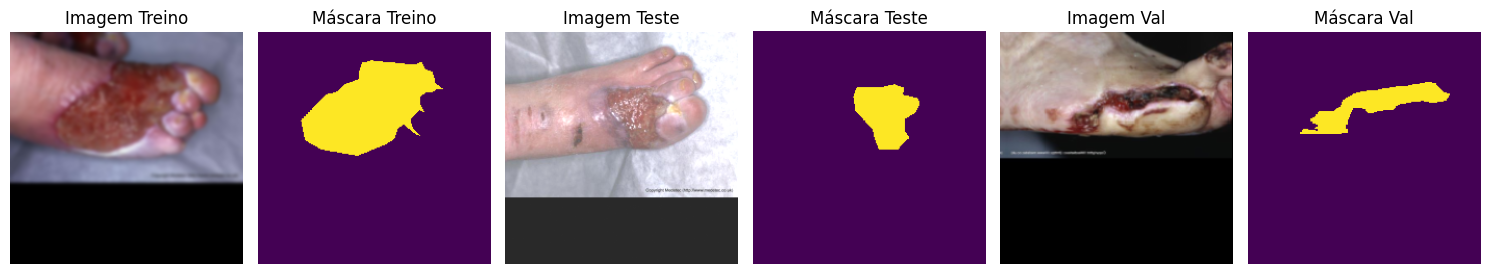

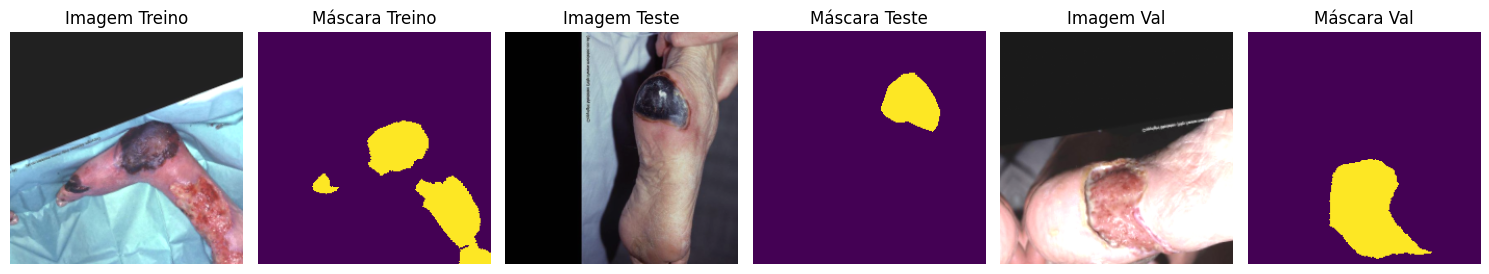

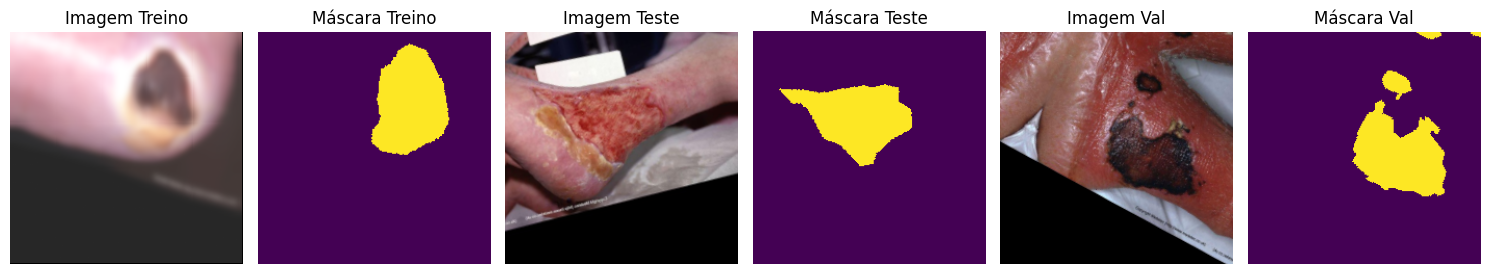

In [6]:
show_dataset_prev(train_loader, test_loader, val_loader, num_images=3)

In [15]:
def train(model, model_name=None, learning_rate = 1e-3, epochs=300):
    if model_name is None:
        model_name    = model.__class__.__name__
    path          = './SemanticPequeNetCIARP'
    width_modifier      = model.width_modifier
    
                
    config = f'width_modifier={width_modifier}'
    print(count_trainable_parameters(model,format=True))

    model_filename = f'{model_name}-wm{width_modifier}-epochs{epochs}.pth'


    trainer = Trainer(model_filename=model_filename, 
                    model_dir=path, 
                    info={'config':config},
                    save_xlsx=True)
    trainer.num_classes = 1
    model = trainer.train(model, train_loader, val_loader, test_loader, 
                            num_epochs=epochs, 
                            verbose=1, 
                            save_every=5, 
                            save_outputs_every=25,
                            learning_rate=learning_rate,
                            continue_from_last=True)
    model.to(device)
    trainer.save_sample_output(test_loader,[0,1,2,3])
    del model
    clear_gpu()
    time.sleep(30)


In [8]:
model = SemanticPequeNet(in_channels=in_channels, out_channels=num_classes, width_modifier=0.5)
train(model, model_name="SemanticPequeNet-Medetec")

51.921
Parando na época 64 por early stopping. 0.2891 Dice: 0.5503 mIoU: 0.3919 IoU: 0.8957 Precision: 0.6382 Recall: 0.5184 Q: 0.2335 Tempo total: 00:03:50 LR:0.000500

Melhor modelo:
 Epoch [44/300] - Loss: 0.0908 Val Loss: 0.2119 Dice: 0.6176 mIoU: 0.4602 IoU: 0.9073 Precision: 0.6559 Recall: 0.6151 Q: 0.3029 Tempo total: 00:02:38 LR:0.001000
Ultimo modelo:
 Epoch [64/300] - Loss: 0.0572 Val Loss: 0.2891 Dice: 0.5503 mIoU: 0.3919 IoU: 0.8957 Precision: 0.6382 Recall: 0.5184 Q: 0.2335 Tempo total: 00:03:50 LR:0.000500 FPS: 679.43
Saved as ./SemanticPequeNetCIARP/SemanticPequeNet-Medetec-wm0.5-epochs300.pth
./SemanticPequeNetCIARP/outputs/sample0-SemanticPequeNet-Medetec-wm0.5-epochs300.png saved.
./SemanticPequeNetCIARP/outputs/sample1-SemanticPequeNet-Medetec-wm0.5-epochs300.png saved.
./SemanticPequeNetCIARP/outputs/sample2-SemanticPequeNet-Medetec-wm0.5-epochs300.png saved.
./SemanticPequeNetCIARP/outputs/sample3-SemanticPequeNet-Medetec-wm0.5-epochs300.png saved.


In [9]:
model = SemanticPequeNet(in_channels=in_channels, out_channels=num_classes, width_modifier=1.0)
train(model, model_name="SemanticPequeNet-Medetec")

178.993
Parando na época 53 por early stopping. 0.3501 Dice: 0.5773 mIoU: 0.4122 IoU: 0.8983 Precision: 0.6576 Recall: 0.5756 Q: 0.2471 Tempo total: 00:05:40 LR:0.000500

Melhor modelo:
 Epoch [33/300] - Loss: 0.0899 Val Loss: 0.1996 Dice: 0.6509 mIoU: 0.4886 IoU: 0.9125 Precision: 0.6936 Recall: 0.6728 Q: 0.3262 Tempo total: 00:03:32 LR:0.001000
Ultimo modelo:
 Epoch [53/300] - Loss: 0.0452 Val Loss: 0.3501 Dice: 0.5773 mIoU: 0.4122 IoU: 0.8983 Precision: 0.6576 Recall: 0.5756 Q: 0.2471 Tempo total: 00:05:40 LR:0.000500 FPS: 343.78
Saved as ./SemanticPequeNetCIARP/SemanticPequeNet-Medetec-wm1.0-epochs300.pth
./SemanticPequeNetCIARP/outputs/sample0-SemanticPequeNet-Medetec-wm1.0-epochs300.png saved.
./SemanticPequeNetCIARP/outputs/sample1-SemanticPequeNet-Medetec-wm1.0-epochs300.png saved.
./SemanticPequeNetCIARP/outputs/sample2-SemanticPequeNet-Medetec-wm1.0-epochs300.png saved.
./SemanticPequeNetCIARP/outputs/sample3-SemanticPequeNet-Medetec-wm1.0-epochs300.png saved.


In [10]:
model = SemanticPequeNet(in_channels=in_channels, out_channels=num_classes, width_modifier=2.0)
train(model, model_name="SemanticPequeNet-Medetec")

660.465
Parando na época 42 por early stopping. 0.5463 Dice: 0.5781 mIoU: 0.4260 IoU: 0.8983 Precision: 0.6168 Recall: 0.5837 Q: 0.2739 Tempo total: 00:08:51 LR:0.000500

Melhor modelo:
 Epoch [22/300] - Loss: 0.0948 Val Loss: 0.2371 Dice: 0.6145 mIoU: 0.4597 IoU: 0.9009 Precision: 0.6452 Recall: 0.6323 Q: 0.3050 Tempo total: 00:04:39 LR:0.001000
Ultimo modelo:
 Epoch [42/300] - Loss: 0.0259 Val Loss: 0.5463 Dice: 0.5781 mIoU: 0.4260 IoU: 0.8983 Precision: 0.6168 Recall: 0.5837 Q: 0.2739 Tempo total: 00:08:51 LR:0.000500 FPS: 164.03
Saved as ./SemanticPequeNetCIARP/SemanticPequeNet-Medetec-wm2.0-epochs300.pth
./SemanticPequeNetCIARP/outputs/sample0-SemanticPequeNet-Medetec-wm2.0-epochs300.png saved.
./SemanticPequeNetCIARP/outputs/sample1-SemanticPequeNet-Medetec-wm2.0-epochs300.png saved.
./SemanticPequeNetCIARP/outputs/sample2-SemanticPequeNet-Medetec-wm2.0-epochs300.png saved.
./SemanticPequeNetCIARP/outputs/sample3-SemanticPequeNet-Medetec-wm2.0-epochs300.png saved.


# Foot Ulcer Seg Challenge

In [8]:
import gc

In [16]:
train_loader, test_loader, val_loader = get_foot_datasets(dataset_dir=config.fuseg_dataset_path, 
                                              resolution=info_dataset_resolution, 
                                              batch_size=info_dataset_batch_size,
                                              augmented=True)

In [17]:
for (images_train, masks_train), (images_test, masks_test) in zip(train_loader, test_loader):
    print(images_train.shape, masks_train.shape)
    break

torch.Size([8, 3, 224, 224]) torch.Size([8, 1, 224, 224])


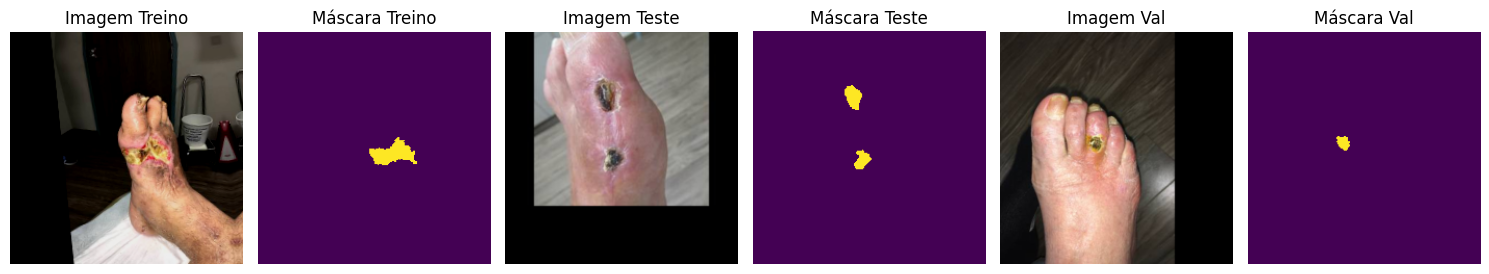

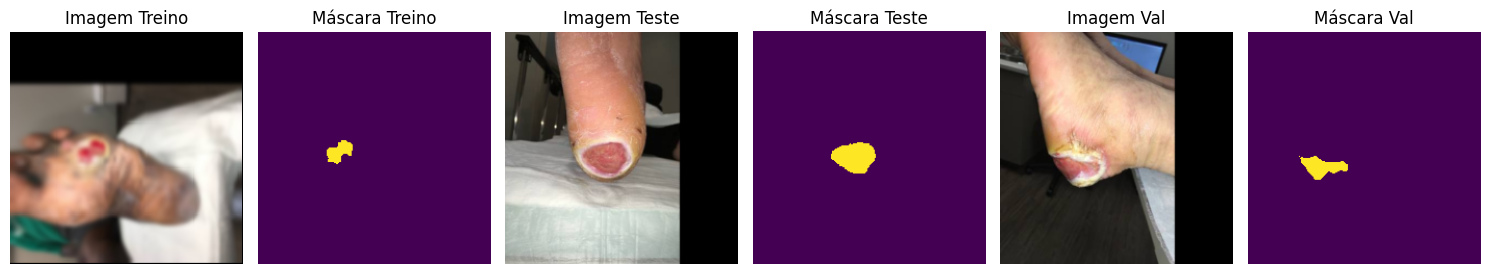

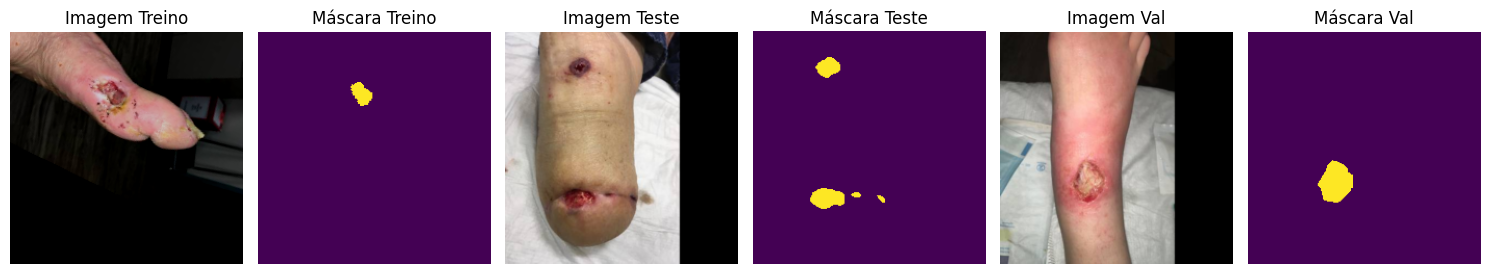

In [11]:
gc.collect()
show_dataset_prev(train_loader, test_loader, val_loader, num_images=3)

## Aproveitando os pesos do medetec

In [18]:
def train2(model, model_name=None, learning_rate = 1e-3, epochs=300):
    path          = './SemanticPequeNetCIARP'
    width_modifier      = model.width_modifier
    
                
    config = f'width_modifier={width_modifier}'
    print(count_trainable_parameters(model,format=True))

    model_filename = f'{model_name}-wm{width_modifier}-epochs{epochs}.pth'
    print(model_filename)

    trainer = Trainer(model_filename=model_filename, 
                    model_dir=path, 
                    info={'config':config},
                    save_xlsx=True)
    trainer.num_classes = 1
    model = trainer.train(model, train_loader, val_loader, test_loader, 
                            num_epochs=epochs, 
                            verbose=1, 
                            save_every=5, 
                            save_outputs_every=25,
                            learning_rate=learning_rate,
                            continue_from_last=True)
    model.to(device)
    trainer.save_sample_output(test_loader,[0,1,2,3])
    



file_name = "./SemanticPequeNetCIARP/SemanticPequeNet-Medetec-wm0.5-epochs300.pth"
model = load_SemanticPequeNet_model(file_name,in_channels=in_channels,out_channels=num_classes,width_modifier=0.5)
train2(model, model_name="SemanticPequeNet-Medetec-FUSeg")

51.921
SemanticPequeNet-Medetec-FUSeg-wm0.5-epochs300.pth
Parando na época 65 por early stopping. 0.0095 Dice: 0.8276 mIoU: 0.7107 IoU: 0.9964 Precision: 0.8211 Recall: 0.8441 Q: 0.5938 Tempo total: 00:46:20 LR:0.000500

Melhor modelo:
 Epoch [45/300] - Loss: 0.0116 Val Loss: 0.0090 Dice: 0.8410 mIoU: 0.7300 IoU: 0.9966 Precision: 0.8269 Recall: 0.8646 Q: 0.6191 Tempo total: 00:32:07 LR:0.001000
Ultimo modelo:
 Epoch [65/300] - Loss: 0.0087 Val Loss: 0.0095 Dice: 0.8276 mIoU: 0.7107 IoU: 0.9964 Precision: 0.8211 Recall: 0.8441 Q: 0.5938 Tempo total: 00:46:20 LR:0.000500 FPS: 700.16
Saved as ./SemanticPequeNetCIARP/SemanticPequeNet-Medetec-FUSeg-wm0.5-epochs300.pth
./SemanticPequeNetCIARP/outputs/sample0-SemanticPequeNet-Medetec-FUSeg-wm0.5-epochs300.png saved.
./SemanticPequeNetCIARP/outputs/sample1-SemanticPequeNet-Medetec-FUSeg-wm0.5-epochs300.png saved.
./SemanticPequeNetCIARP/outputs/sample2-SemanticPequeNet-Medetec-FUSeg-wm0.5-epochs300.png saved.
./SemanticPequeNetCIARP/outputs/s

In [19]:
file_name = "./SemanticPequeNetCIARP/SemanticPequeNet-Medetec-wm1.0-epochs300.pth"
model = load_SemanticPequeNet_model(file_name,in_channels=in_channels,out_channels=num_classes,width_modifier=1.0)
train2(model, model_name="SemanticPequeNet-Medetec-FUSeg")

178.993
SemanticPequeNet-Medetec-FUSeg-wm1.0-epochs300.pth
Parando na época 65 por early stopping. 0.0128 Dice: 0.8153 mIoU: 0.6931 IoU: 0.9963 Precision: 0.8420 Recall: 0.8030 Q: 0.5709 Tempo total: 01:26:04 LR:0.000500

Melhor modelo:
 Epoch [45/300] - Loss: 0.0093 Val Loss: 0.0097 Dice: 0.8374 mIoU: 0.7229 IoU: 0.9965 Precision: 0.8443 Recall: 0.8374 Q: 0.6084 Tempo total: 00:59:20 LR:0.001000
Ultimo modelo:
 Epoch [65/300] - Loss: 0.0060 Val Loss: 0.0128 Dice: 0.8153 mIoU: 0.6931 IoU: 0.9963 Precision: 0.8420 Recall: 0.8030 Q: 0.5709 Tempo total: 01:26:04 LR:0.000500 FPS: 345.83
Saved as ./SemanticPequeNetCIARP/SemanticPequeNet-Medetec-FUSeg-wm1.0-epochs300.pth
./SemanticPequeNetCIARP/outputs/sample0-SemanticPequeNet-Medetec-FUSeg-wm1.0-epochs300.png saved.
./SemanticPequeNetCIARP/outputs/sample1-SemanticPequeNet-Medetec-FUSeg-wm1.0-epochs300.png saved.
./SemanticPequeNetCIARP/outputs/sample2-SemanticPequeNet-Medetec-FUSeg-wm1.0-epochs300.png saved.
./SemanticPequeNetCIARP/outputs/

## Treino do zero

In [14]:
model = SemanticPequeNet(in_channels=in_channels, out_channels=num_classes, width_modifier=0.5)
train(model, model_name="SemanticPequeNet-FUSeg")

51.921
Parando na época 116 por early stopping. 0.0110 Dice: 0.8306 mIoU: 0.7124 IoU: 0.9964 Precision: 0.8427 Recall: 0.8348 Q: 0.5942 Tempo total: 01:19:13 LR:0.000250

Melhor modelo:
 Epoch [96/300] - Loss: 0.0078 Val Loss: 0.0090 Dice: 0.8518 mIoU: 0.7451 IoU: 0.9968 Precision: 0.8509 Recall: 0.8659 Q: 0.6384 Tempo total: 01:05:34 LR:0.000500
Ultimo modelo:
 Epoch [116/300] - Loss: 0.0068 Val Loss: 0.0110 Dice: 0.8306 mIoU: 0.7124 IoU: 0.9964 Precision: 0.8427 Recall: 0.8348 Q: 0.5942 Tempo total: 01:19:13 LR:0.000250 FPS: 713.25
Saved as ./SemanticPequeNetCIARP/SemanticPequeNet-FUSeg-wm0.5-epochs300.pth
./SemanticPequeNetCIARP/outputs/sample0-SemanticPequeNet-FUSeg-wm0.5-epochs300.png saved.
./SemanticPequeNetCIARP/outputs/sample1-SemanticPequeNet-FUSeg-wm0.5-epochs300.png saved.
./SemanticPequeNetCIARP/outputs/sample2-SemanticPequeNet-FUSeg-wm0.5-epochs300.png saved.
./SemanticPequeNetCIARP/outputs/sample3-SemanticPequeNet-FUSeg-wm0.5-epochs300.png saved.


In [15]:
model = SemanticPequeNet(in_channels=in_channels, out_channels=num_classes, width_modifier=1.0)
train(model, model_name="SemanticPequeNet-FUSeg")

178.993
Parando na época 74 por early stopping. 0.0132 Dice: 0.8347 mIoU: 0.7193 IoU: 0.9966 Precision: 0.8760 Recall: 0.8058 Q: 0.6039 Tempo total: 01:35:02 LR:0.000250

Melhor modelo:
 Epoch [54/300] - Loss: 0.0063 Val Loss: 0.0101 Dice: 0.8503 mIoU: 0.7436 IoU: 0.9969 Precision: 0.8631 Recall: 0.8491 Q: 0.6370 Tempo total: 01:09:21 LR:0.000500
Ultimo modelo:
 Epoch [74/300] - Loss: 0.0047 Val Loss: 0.0132 Dice: 0.8347 mIoU: 0.7193 IoU: 0.9966 Precision: 0.8760 Recall: 0.8058 Q: 0.6039 Tempo total: 01:35:02 LR:0.000250 FPS: 349.90
Saved as ./SemanticPequeNetCIARP/SemanticPequeNet-FUSeg-wm1.0-epochs300.pth
./SemanticPequeNetCIARP/outputs/sample0-SemanticPequeNet-FUSeg-wm1.0-epochs300.png saved.
./SemanticPequeNetCIARP/outputs/sample1-SemanticPequeNet-FUSeg-wm1.0-epochs300.png saved.
./SemanticPequeNetCIARP/outputs/sample2-SemanticPequeNet-FUSeg-wm1.0-epochs300.png saved.
./SemanticPequeNetCIARP/outputs/sample3-SemanticPequeNet-FUSeg-wm1.0-epochs300.png saved.
